<a href="https://colab.research.google.com/github/flow4u/public/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19

Data Source: https://github.com/CSSEGISandData/COVID-19
 
 

To run this notebook: **CTRL + F9**

In [0]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [0]:
#@title
data_sets = ('Confirmed', 'Recovered', 'Deaths')
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-"

for set in data_sets:
  df_temp = pd.read_csv(base_url+set+'.csv')
  df_temp = df_temp.drop(['Lat', 'Long'],axis=1)
  del df_temp['Province/State']
  # not all date columns have the same format, some are mm/d/yy, others mm/dd/yy
  # this will convert first to date, then back to string
  for col in df_temp.columns:
    try:
      col1 = col[:len(col)-2]+'20'+col[-2:]
      col_new = datetime.strptime(col1,'%m/%d/%Y')
      col_new = datetime.strftime(col_new, '%Y-%m-%d')
      df_temp.rename(columns={col: col_new}, inplace=True)
    except:
      pass
  df_temp = df_temp.groupby(['Country/Region']).sum()
  df_temp['Status'] = set
  try:
    df = df.append(df_temp, sort=False)
  except:
    df=df_temp

df = df.reindex(sorted(df.columns), axis=1)  

In [0]:
#@title
europe = ['Austria', 'Belgium', 'Croatia', 'Finland',
       'France', 'Germany','Italy', 'Norway', 'Romania','Greece','Georgia',
       'Spain', 'Sweden','Switzerland', 'North Macedonia', 
       'UK']

western = ['Japan','Australia', 'Canada', 'US']
western.extend(europe)

asia_excl_mainland_china = ['Cambodia',
       'Hong Kong', 'India',
       'Japan', 'Macau', 'Malaysia',
       'Nepal', 'Philippines', 'Singapore', 'South Korea',
       'Sri Lanka', 'Taiwan', 'Thailand',
       'Vietnam']

asia = ['Mainland China']
asia.extend(asia_excl_mainland_china)

south_america = ['Brazil']

middle_east = ['Afghanistan', 'Algeria', 'Egypt', 'Bahrain','Kuwait','Oman',
       'Iran', 'Iraq', 'Israel', 'Pakistan',
       'Lebanon', 'Macau',
       'United Arab Emirates']

all_countries = ['Others', 'Russia']
all_countries.extend(middle_east)
all_countries.extend(south_america)
all_countries.extend(asia)
all_countries.extend(western)

display_unique = False
for t in df.index.unique():
  if all_countries.count(t) == 0:
    print("Missing: '"+t+ "'")
    display_unique = True

if display_unique:
  print('The above countries must be added to the appropiate filters in the code')
  print('The code for the filters can be found above this output')

# Selecting what data to see

In [0]:
#@markdown Select and Press **CTRL + F10** to update the graphs \

#@markdown **Europe** = All European countries excl Russia

country_selection = "Europe" #@param ["All", "Not Mainland China", 'Mainland China", "Europe", "Europe + North America + Japan + Australia", "Russia", "Middle-East", "India", "Others", "Asia", "Asia excl Mainland China"] {allow-input: true}
stepsize =  1#@param {type:"integer"}
df2=[]
if country_selection == 'Not Mainland China':
  df2 = df[df.index != 'Mainland China']
elif country_selection == 'Mainland China':
  df2 = df[df.index == 'Mainland China']
elif country_selection == 'Middle-East':
  df2 = df[df.index.isin(middle_east)]
elif country_selection == 'Asia':
  df2 = df[df.index.isin(asia)]
elif country_selection == 'Asia excl Mainland China':
  df2 = df[df.index.isin(asia_excl_mainland_china)]
elif country_selection == 'India':
  df2 = df[df.index == 'India']
elif country_selection == 'Europe':
  df2 = df[df.index.isin(europe)]
elif country_selection == 'Europe + North America + Japan + Australia':
  df2 = df[df.index.isin(western)]
elif country_selection == 'Russia':
  df2 = df[df.index == 'Russia']
elif country_selection == 'Others':
  df2 = df[df.index == 'Others']
else:
  df2 = df
# df2.head()

df_status = df2.groupby(['Status']).sum()

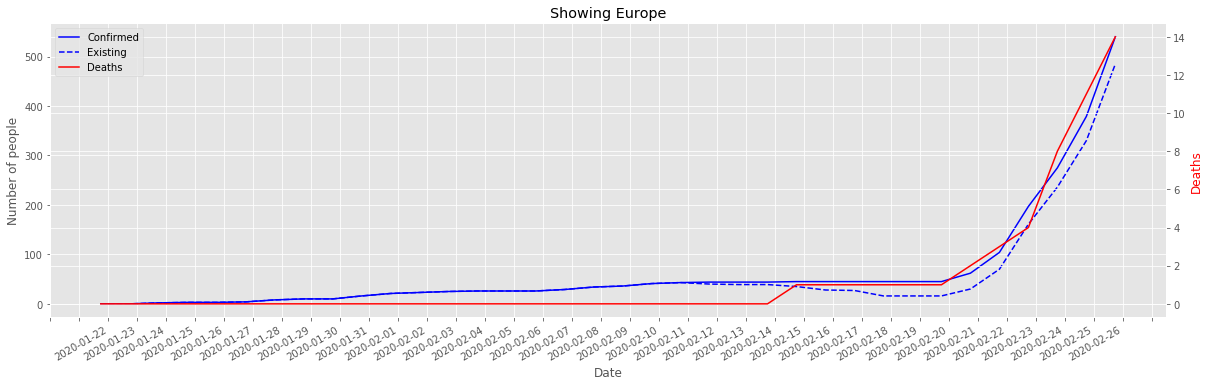

In [5]:
#@title

df_plot = df_status.T.reset_index()
df_plot['Existing'] = df_plot['Confirmed'] - df_plot['Deaths'] - df_plot['Recovered']
plt.style.use('ggplot')
x = df_plot['index']
y1 = df_plot['Confirmed']
y2 = df_plot['Deaths']
y3 = df_plot['Existing']
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
line1, = ax1.plot(x, y1, 'b-', label = 'Confirmed')
line2, = ax1.plot(x, y3, 'b--', label = 'Existing')
line3, = ax2.plot(x, y2, 'r-', label = 'Deaths')

fig.autofmt_xdate()

# ax1.set_ylim(0,55000)
start, end = ax1.get_xlim()
# stepsize = 5
ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of people')
ax2.set_ylabel('Deaths', color='r')


title = 'Showing ' + country_selection
plt.legend(handles=[line1, line2, line3], loc='upper left')
plt.title(title)

plt.show()

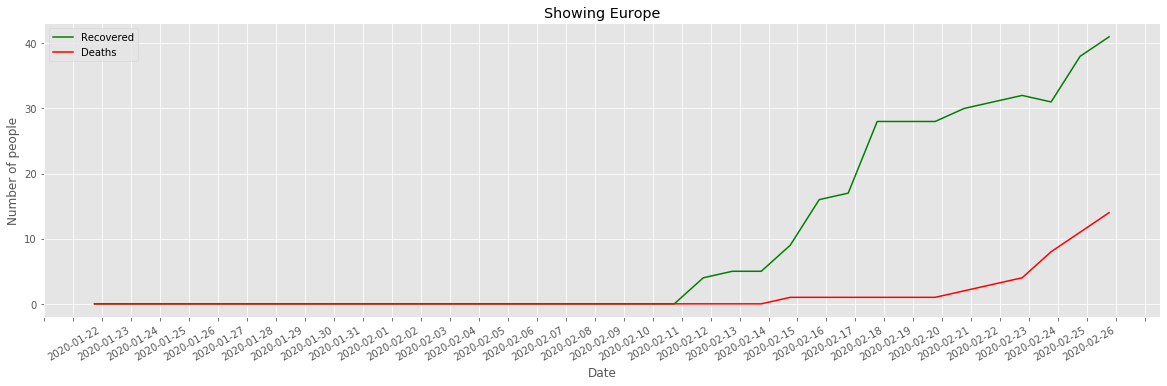

In [6]:
#@title
df_plot = df_status.T.reset_index()

plt.style.use('ggplot')
y11 = 'Recovered'
y21 = 'Deaths'
x = df_plot['index']
y1 = df_plot[y11]
y2 = df_plot[y21]
fig, ax1 = plt.subplots(figsize=(20,6))

fig.autofmt_xdate()

# ax2 = ax1.twinx()
line1, = ax1.plot(x, y1, 'g-', label=y11)
line2, = ax1.plot(x, y2, 'r-', label=y21)

# ax1.set_ylim(0,55000)
start, end = ax1.get_xlim()
# stepsize = 5
ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of people')

title = 'Showing ' + country_selection
plt.legend(handles=[line1, line2])
plt.title(title)

plt.show()


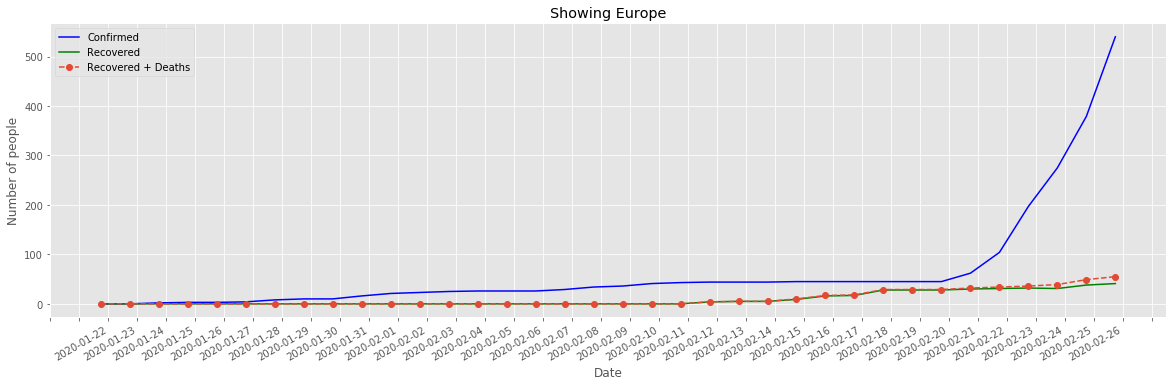

In [7]:
#@title
df_plot = df_status.T.reset_index()
df_plot['Recovered + Deaths'] = df_plot['Recovered'] +df_plot['Deaths']
plt.style.use('ggplot')
y11 = 'Confirmed'
y21 = 'Recovered'
y31 = 'Recovered + Deaths'
x = df_plot['index']
y1 = df_plot[y11]
y2 = df_plot[y21]
y3 = df_plot[y31]
fig, ax1 = plt.subplots(figsize=(20,6))

fig.autofmt_xdate()

# ax2 = ax1.twinx()
line1, = ax1.plot(x, y1, 'b-', label=y11)
line2, = ax1.plot(x, y2, 'g-', label=y21)
line3, = ax1.plot(x, y3, 'o--', label=y31)

# ax1.set_ylim(0,55000)
start, end = ax1.get_xlim()
# stepsize = 5
ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of people')

title = 'Showing ' + country_selection
plt.legend(handles=[line1, line2, line3])
plt.title(title)

plt.show()

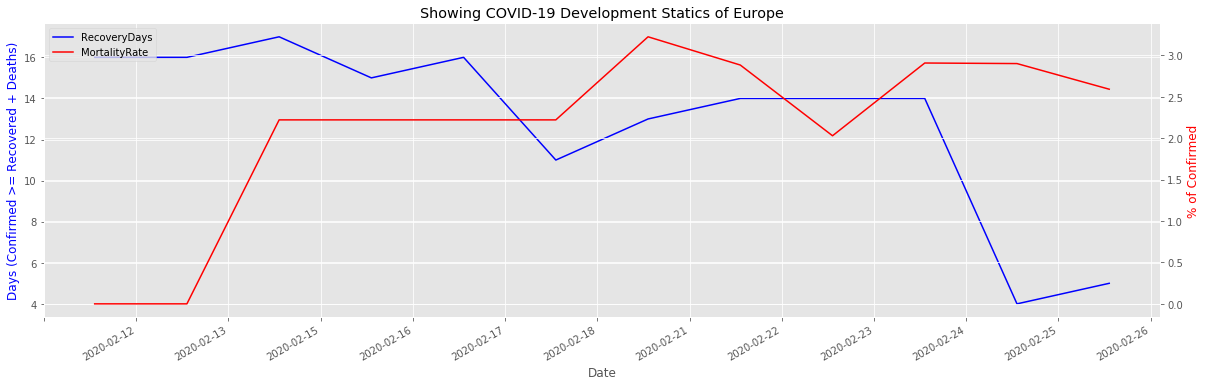

In [8]:
#@title
df_temp2 = df_status.T.reset_index()
date_list=[]
days_list=[]
mortality_rate_list=[]
value_temp = -1
value2_temp = -1
value3_temp = -1
for index, row in df_temp2.iterrows():
  if row['Recovered'] > 0:
    value_lookup = row['Recovered']
    value2_lookup = row['Confirmed']
    value3_lookup = row['Deaths']
    mortality_rate = value3_lookup / value2_lookup * 100
    # mortality_rate_list.append(mortality_rate)
    if(value_temp != value_lookup or value2_temp != value2_lookup or value3_temp != value3_lookup):
      for index2, row2 in df_temp2.iterrows():
        if row2['Confirmed'] >= (value_lookup+value3_lookup):
          date1 = datetime.strptime(row['index'], '%Y-%m-%d')
          date2 = datetime.strptime(row2['index'], '%Y-%m-%d')
          recovery_time = date1-date2
          recovery_time_date = datetime.strftime(date1, '%Y-%m-%d')
          recovery_days = recovery_time.days
          date_list.append(recovery_time_date)
          days_list.append(recovery_days)
          mortality_rate_list.append(mortality_rate)
          break
      value_temp = value_lookup
      value2_temp = value2_lookup
      value3_temp = value3_lookup


df_recovery_time = pd.DataFrame(days_list, index=date_list, columns=['RecoveryDays'])
df_mortality_rate = pd.DataFrame(mortality_rate_list, index=date_list, columns=['MortalityRate'])

plt.style.use('ggplot')
y11 = 'RecoveryDays'
y21 = 'MortalityRate'
x = df_recovery_time.index
y1 = df_recovery_time[y11]
y2 = df_mortality_rate[y21]
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
marker1 = 'o'
marker2 = 'x'
if df_recovery_time.shape[0] > 1:
  marker1 = ''
  marker2 = ''
line1, = ax1.plot(x, y1, 'b-', label=y11, marker=marker1)
line2, = ax2.plot(x, y2, 'r-', label=y21, marker=marker2)

fig.autofmt_xdate()

# ax1.set_ylim(0,55000)
start, end = ax1.get_xlim()
# stepsize = 5
ax1.xaxis.set_ticks(np.arange(start, end, stepsize))

ax1.set_xlabel('Date')
ax1.set_ylabel('Days (Confirmed >= Recovered + Deaths)', color='b')
ax2.set_ylabel('% of Confirmed', color='r')

title = 'Showing COVID-19 Development Statics of ' + country_selection
plt.legend(handles=[line1,line2], loc='upper left')
plt.title(title)

plt.show()